Simple Linear Regression


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
## Read the dataset
df=pd.read_csv("height-weight .csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


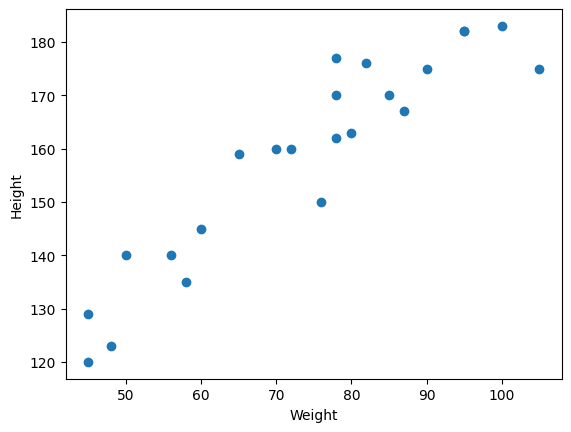

In [9]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

In [14]:
#Dividing Features into Independent and Dependent
X = df[['Weight']]
y = df[['Height']]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

NameError: name 'X' is not defined

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

Standardizing the Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

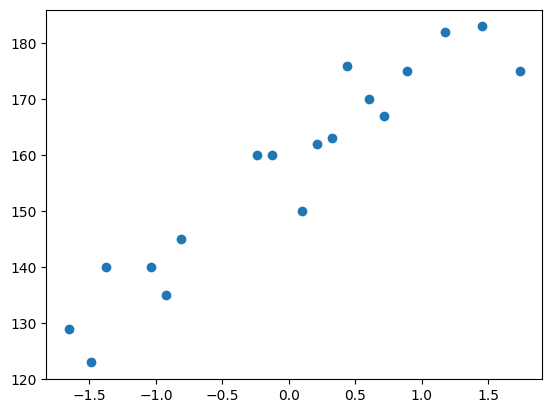

In [18]:
plt.scatter(X_train, y_train)
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression

In [22]:
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
print('Coefficient (Slope):', regressor.coef_[0])
print('Intercept:', regressor.intercept_)

Coefficient (Slope): [17.03440872]
Intercept: [157.5]


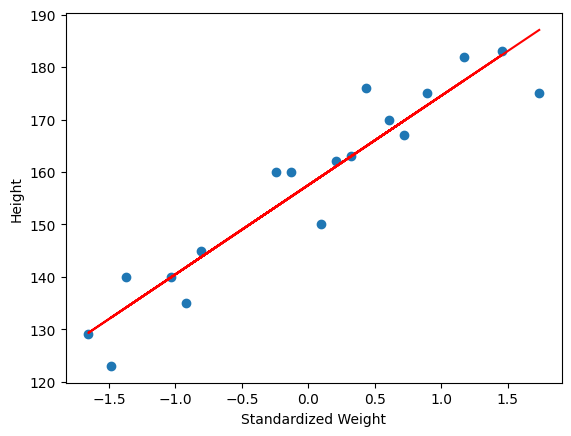

In [25]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.xlabel('Standardized Weight')
plt.ylabel('Height')
plt.show()

In [26]:
y_pred_test = regressor.predict(X_test)


In [27]:
print('Actual:', y_test.values)
print('Predicted:', y_pred_test)

Actual: [[177]
 [170]
 [120]
 [182]
 [159]]
Predicted: [[161.08467086]
 [161.08467086]
 [129.3041561 ]
 [177.45645118]
 [148.56507414]]


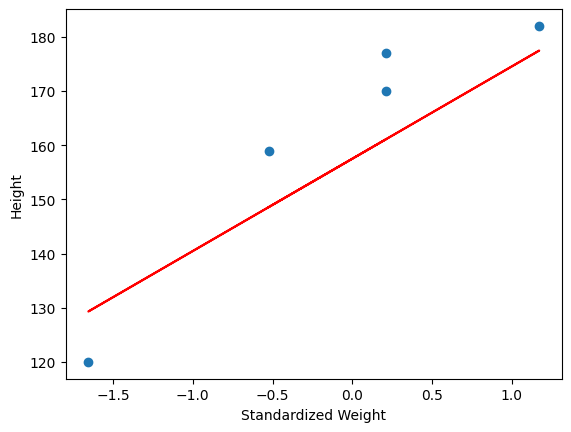

In [28]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test, color='red')
plt.xlabel('Standardized Weight')
plt.ylabel('Height')
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [30]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R squared:', r2)

Mean Squared Error: 109.77592599051664
Mean Absolute Error: 9.822657814519232
Root Mean Squared Error: 10.477400726827081
R squared: 0.776986986042344


Calculating Adjusted R squared

In [31]:
n = len(y_test)
k = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print('Adjusted R squared:', adjusted_r2)

Adjusted R squared: 0.7026493147231252


In [35]:
new_weight = np.array([[80]])  # Weight in kg
scaled_weight = scaler.transform(new_weight)
predicted_height = regressor.predict(scaled_weight)
#print(f'Predicted height for weight 80kg: {predicted_height[0]:.2f}')
print(f'Predicted height for weight 80kg: {predicted_height[0][0]:.2f}')


Predicted height for weight 80kg: 163.01


C:\Users\Praveen\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


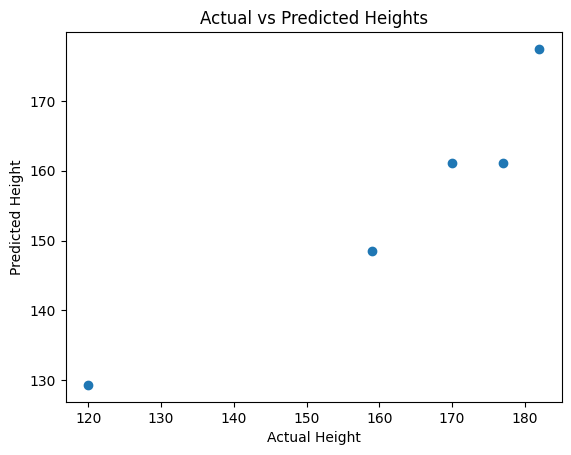

In [36]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Height')
plt.ylabel('Predicted Height')
plt.title('Actual vs Predicted Heights')
plt.show()

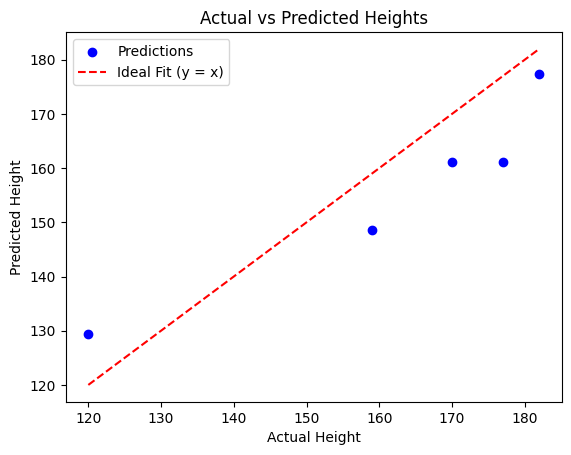

In [37]:
plt.scatter(y_test, y_pred_test, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit (y = x)')
plt.xlabel('Actual Height')
plt.ylabel('Predicted Height')
plt.title('Actual vs Predicted Heights')
plt.legend()
plt.show()


Calculating and Plotting Residuals

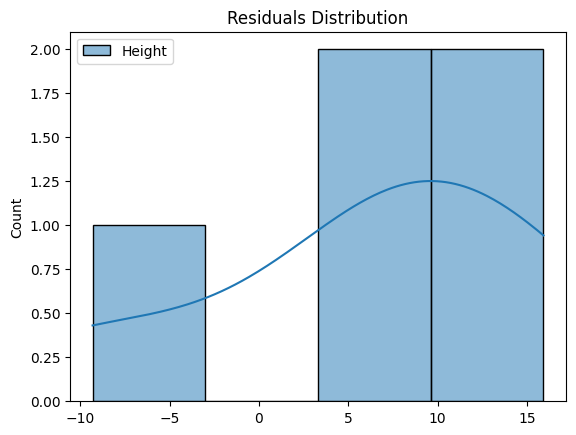

In [ ]:
import seaborn as sns

residuals = y_test - y_pred_test
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()w

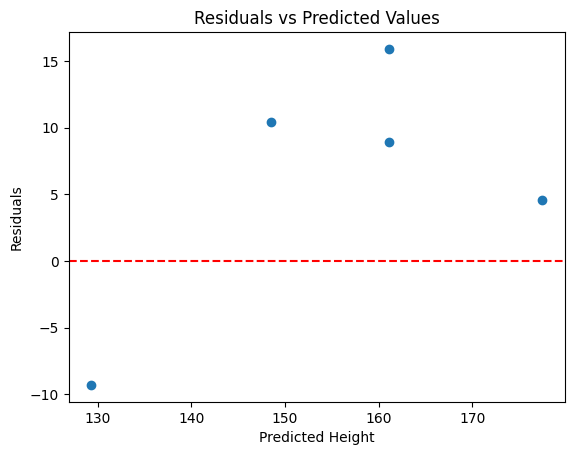

In [39]:
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Height')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()